In [1]:
hidefigs = False
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
run run_residuals -vx -i FE_H -u -0.4 -d -0.5 -s red_clump -c False 


Initialization runtime 3.21 s
Number of stars 846

Maximum SNR before correction 200.00
SNR correction runtime 0.12 s
Maximum SNR before correction 200.00

Nonzero Minimum SNR before mask 50.0001
SNR cut runtime 0.00 s
Minimum SNR after mask 50.0001

Bitmask application runtime 0.00 s

Pixel residuals runtime 1.85 s
Maximum residual 0.217873524319 

Finding random sigma runtime 1.72 s



In [6]:
from residuals import readElementWindow,elems
elemwindows,window_all,window_peak,windowPeaks,windowPixels,tophats = readElementWindow('windowinfo.pkl')

weighteds is zero for elem  Al  at  (array([ 38, 154, 155, 486, 527, 567, 574, 586, 616, 635, 689, 701, 704,
       707, 715, 720]),)
weighteds is zero for elem  Ca  at  (array([  4,  13,  21,  29,  35,  38,  48,  52,  56,  57,  59,  69,  75,
        78,  80,  84,  94,  99, 103, 104, 105, 107, 109, 111, 113, 114,
       120, 123, 127, 136, 141, 144, 152, 153, 154, 155, 156, 157, 161,
       162, 165, 182, 203, 208, 213, 230, 242, 243, 244, 251, 263, 273,
       310, 316, 365, 386, 419, 478, 479, 498, 509, 528, 588, 610, 617,
       650, 651, 660, 685, 690, 695, 702, 703, 704, 705, 707, 709, 715,
       720, 725, 737, 748, 752, 763, 777, 784, 807, 811, 817, 823, 843, 844]),)
weighteds is zero for elem  C  at  (array([], dtype=int64),)
weighteds is zero for elem  Fe  at  (array([], dtype=int64),)
weighteds is zero for elem  K  at  (array([], dtype=int64),)
weighteds is zero for elem  Mg  at  (array([  5, 827]),)
weighteds is zero for elem  Mn  at  (array([ 21,  32,  59,  84,  89,  91,  9

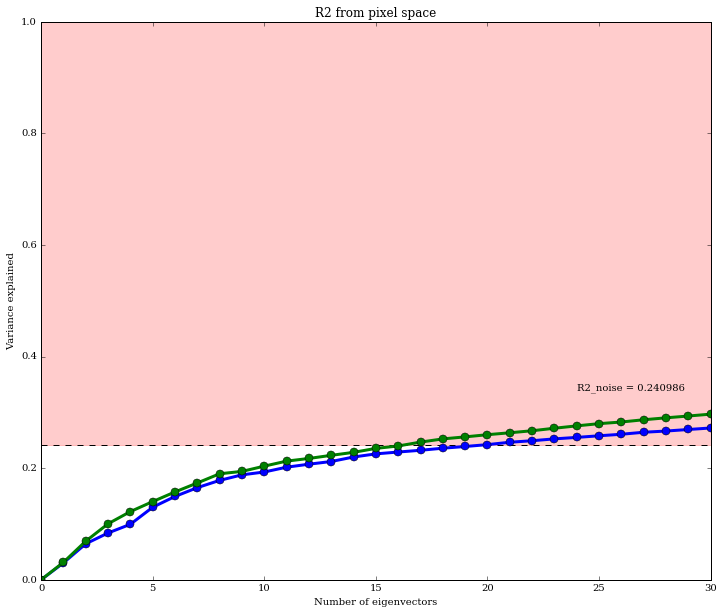

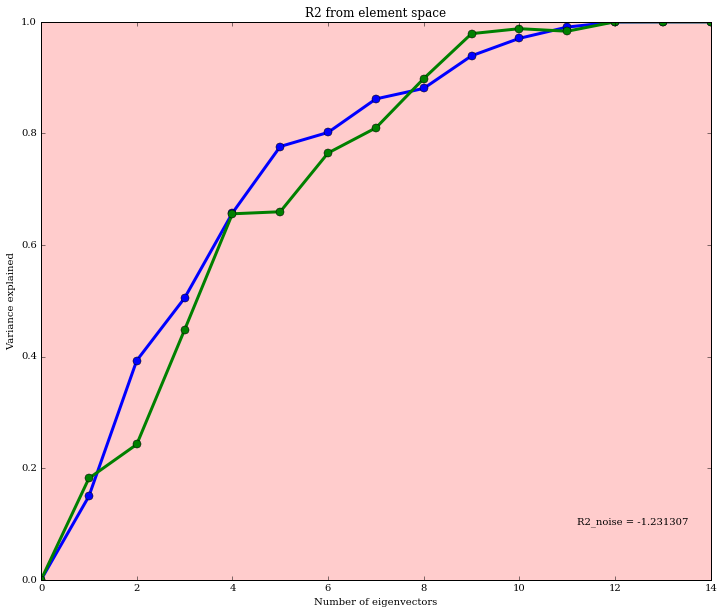

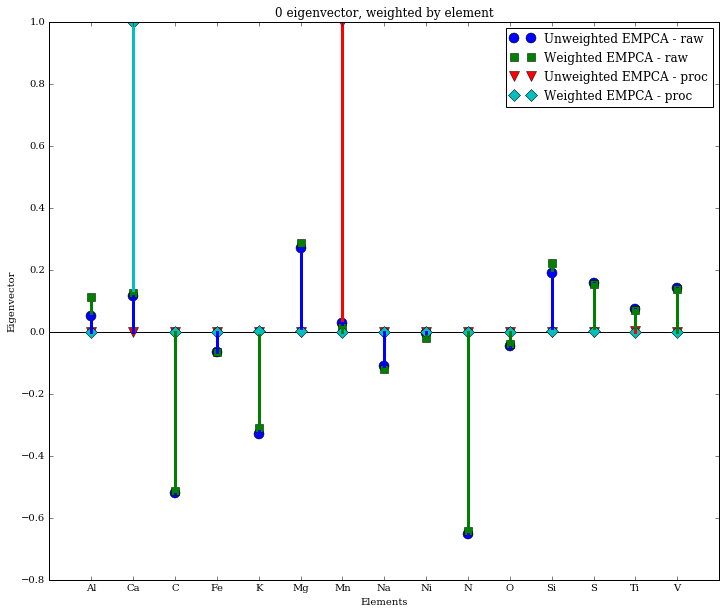

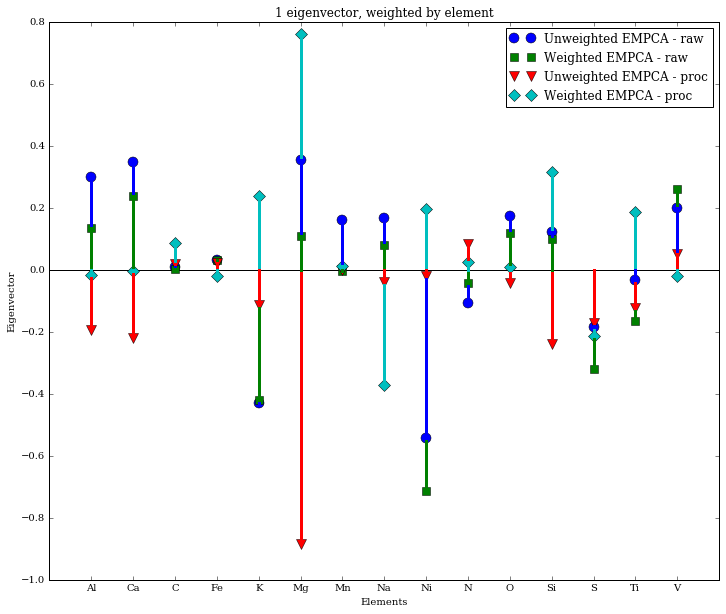

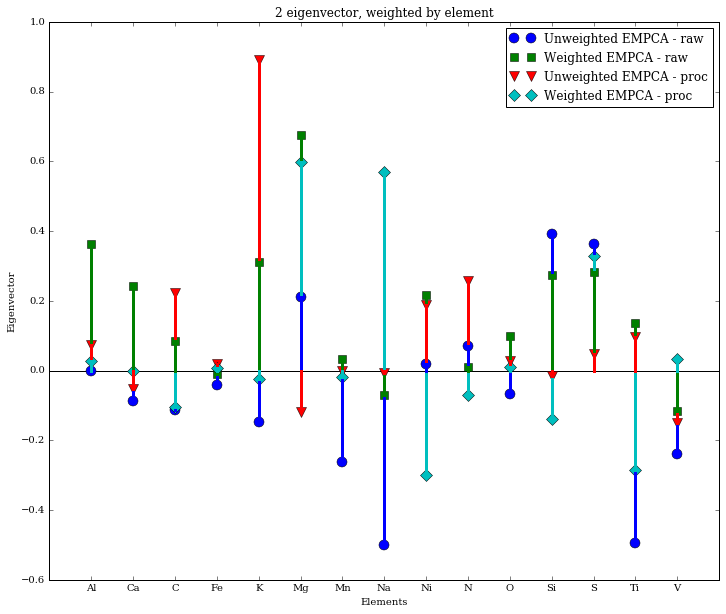

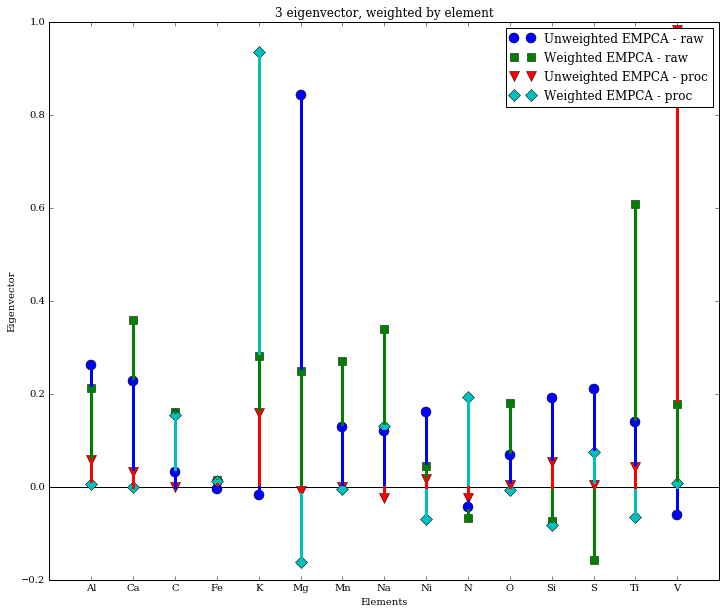

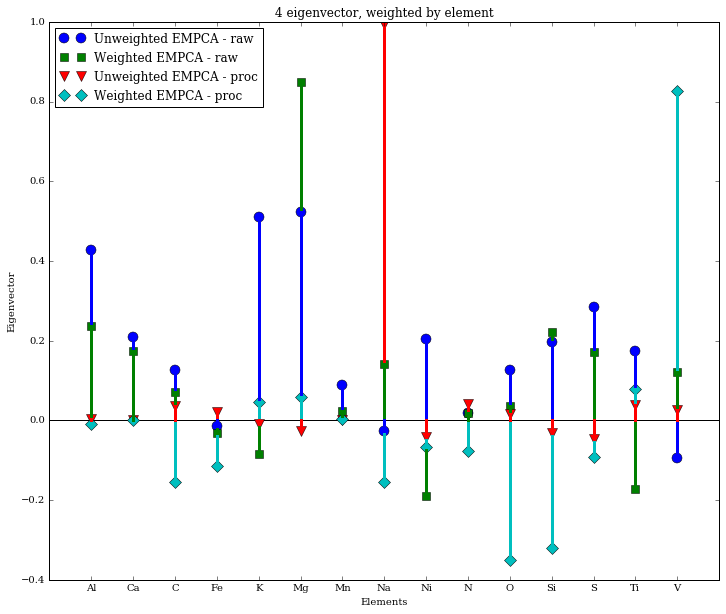

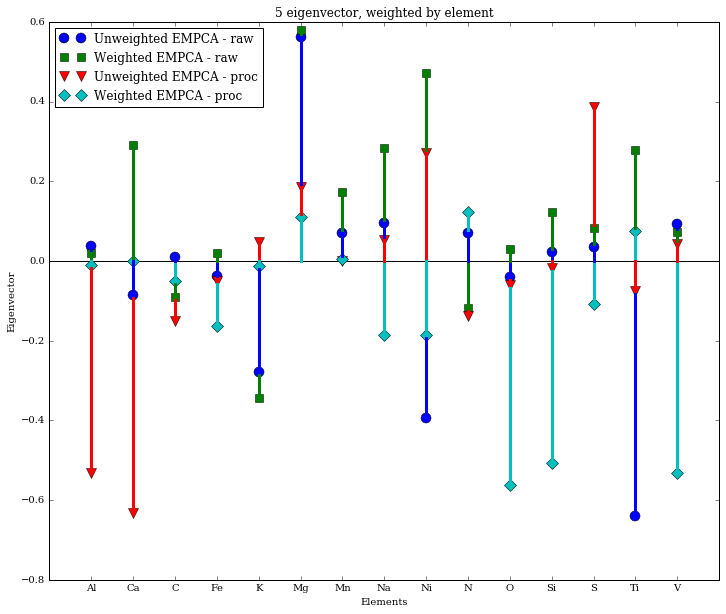

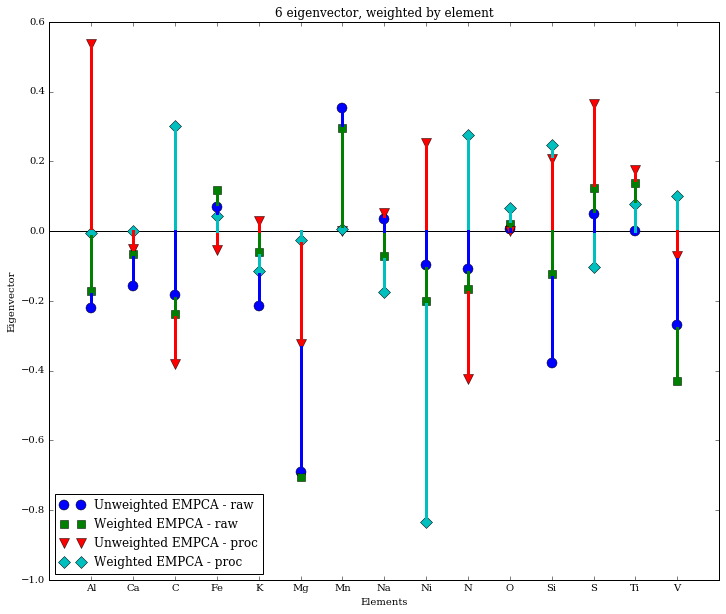

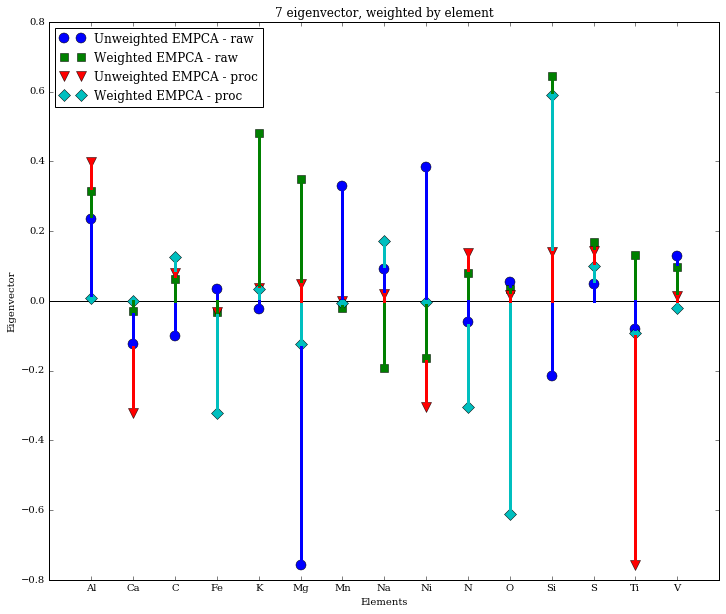

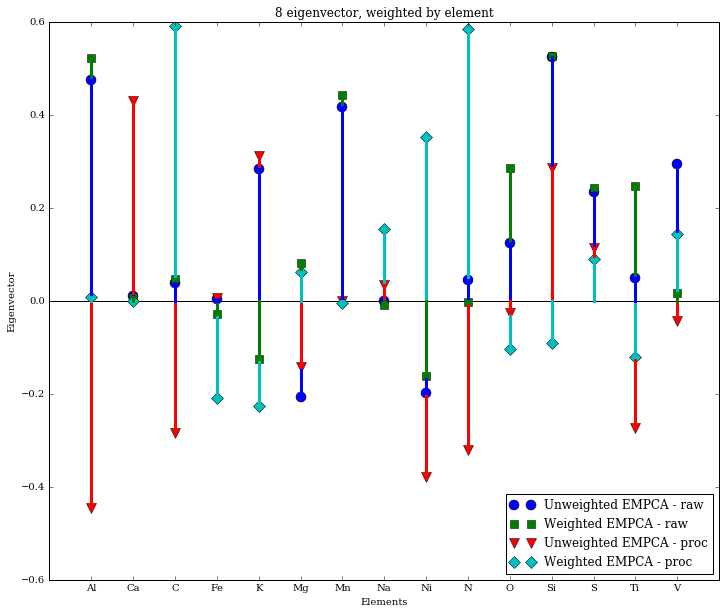

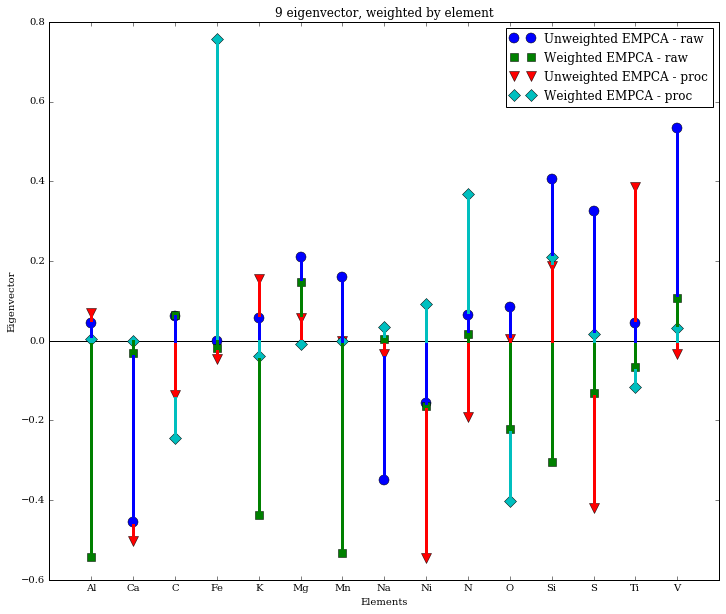

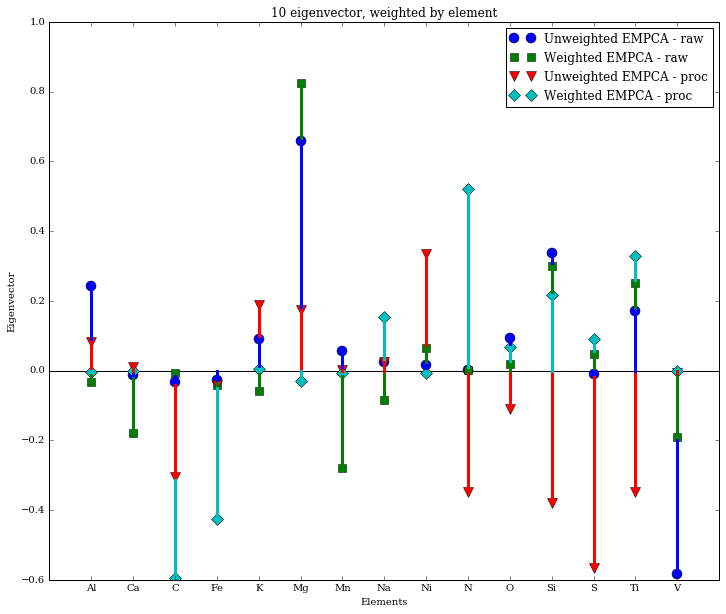

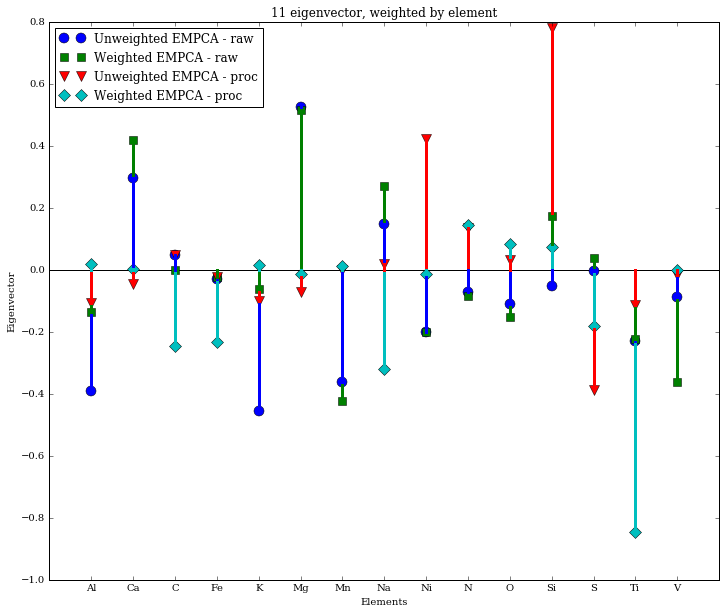

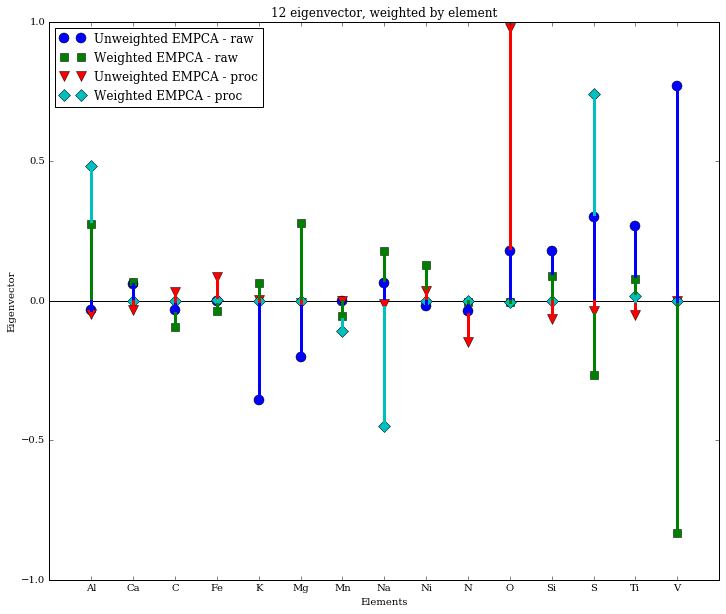

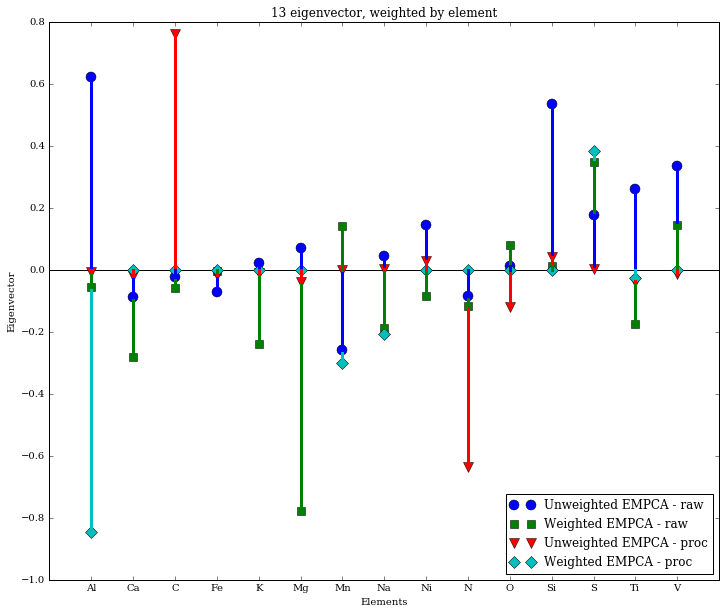

In [13]:
run run_empca -vu -m red_clump/pickles/model_FE_H_u-0.4_d-0.5.pkl -d 2e-3 -n 30

In [ ]:
for elem in elems:
    w = elemwindows[elem]
    elemregions = np.tile(w,(model.numstars,1))
    shapeinds = np.where(elemregions != 0)
    elemregions[model.mask!=0] = np.nan
    hidewindow = np.unique(np.where(elemregions==0)[1])
    window = [i for i in range(aspcappix) if i not in hidewindow]
    elemregions = elemregions.T[window].T
    plt.figure(figsize=(10,8))
    plt.imshow(elemregions,aspect = float(elemregions.shape[1])/model.numstars,interpolation='nearest')
    plt.title('Masked window for {0}'.format(elem))
    splitval = len(window)/10
    plt.xticks(range(elemregions.shape[1])[::splitval],window[::splitval])
    plt.colorbar()
    plt.savefig('temp{0}.png'.format(elem))

In [ ]:
maSNR = np.ma.mean(starsample.specs/starsample.errs,axis=1)
# Plot SNR histogram

SNRhist,SNRbins = np.histogram(starsample.data['SNR'],bins = 50)
maSNRhist,maSNRbins = np.histogram(maSNR,bins=5)
plt.figure(figsize=(16,14))
plt.bar(SNRbins[:-1],SNRhist,width = (SNRbins[1]-SNRbins[0]),label='APOGEE SNR')
plt.bar(maSNRbins[:-1],maSNRhist,width = (maSNRbins[1]-maSNRbins[0]),color='green',alpha=0.5,label='SNR after masking')
plt.xlabel('SNR')
plt.ylabel('Number of stars')
plt.legend(loc = 'best')

In [ ]:
plt.figure()
allmasksplot = np.copy(starsample.mask.astype(np.float64))
allmasksplot[np.where(starsample.mask==0)] = np.nan
plt.imshow(allmasksplot,aspect = 7214./starsample.numstars,interpolation='nearest',cmap = 'viridis')
plt.ylim(0,starsample.numstars)
plt.colorbar()
plt.savefig('./{0}/test2_mask_order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

plt.figure()
allbitmasksplot = np.copy(starsample.bitmask).astype(np.float64)
allbitmasksplot[np.where(starsample.bitmask==0)] = np.nan
plt.imshow(np.log2(allbitmasksplot),aspect = 7214./starsample.numstars,interpolation='nearest',cmap = 'viridis')
plt.ylim(0,starsample.numstars)
plt.colorbar()
plt.savefig('./{0}/test2_bitmask_order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

plt.figure()
SNRplot = starsample.specs/starsample.errs
SNRplot[np.where(SNRplot.mask!=0)] = np.nan
plt.imshow(SNRplot,aspect = 7214./starsample.numstars,interpolation='nearest',cmap = 'viridis')
plt.ylim(0,starsample.numstars)
plt.colorbar()
plt.savefig('./{0}/test2_SNR_order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

In [ ]:
residcov = np.ma.cov(starsample.residual)
normresidcov = np.ma.cov(starsample.residual/starsample.errs.T)

In [ ]:
rcovlim = 1e-4
nrcovlim = 4

In [ ]:
# Plot covariance of raw pixel residuals
plt.figure(figsize=(10,12))
plt.imshow(residcov,interpolation='nearest',cmap = 'Spectral',vmax=rcovlim,vmin=-rcovlim)
plt.colorbar()
plt.savefig('./{0}/covariance/order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

# Plot covariance of residuals divided by pixel flux uncertainty
plt.figure(figsize=(10,12))
plt.imshow(normresidcov,interpolation='nearest',cmap = 'Spectral',vmax=nrcovlim,vmin=-nrcovlim)
plt.colorbar()
plt.savefig('./{0}/covariance/norm_order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

# Plot diagonal of covariance of raw pixel residuals
plt.figure(figsize=(16,4))
diag = np.array([residcov[i,i] for i in range(len(residcov))])
plt.plot(diag)
plt.xlim(0,len(diag))
plt.xlabel('Pixel')
plt.ylabel('Variance')
plt.savefig('./{0}/covariance/diag_order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

# Plot diagonal of  covariance of residuals divided by pixel flux uncertainty
plt.figure(figsize=(16,4))
normdiag = np.array([normresidcov[i,i] for i in range(len(normresidcov))])
plt.plot(normdiag,linewidth = 0.5)
plt.xlim(0,len(normdiag))
plt.ylim(0,10)
plt.xlabel('Pixel')
plt.ylabel('Variance')
plt.savefig('./{0}/covariance/norm_diag_order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

# Plot two slices of the covariance matrices
samppix = 3700
plt.figure(figsize=(16,8))
plt.plot(residcov[samppix]/np.max(residcov[samppix]),label = 'Raw residual, peak = {0}'.format(np.max(residcov[samppix])))
plt.plot(normresidcov[samppix]/np.max(normresidcov[samppix]),label = 'Sigma normalized residual, peak = {0}'.format(np.max(normresidcov[samppix])))
plt.axvline(samppix,color='red')
plt.ylabel('Covariance at pixel {0} normalized to peak'.format(samppix))
plt.xlabel('Pixel')
plt.xlim(samppix-100,samppix+100)
plt.legend(loc = 'best')
plt.savefig('./{0}/covariance/pix{1}_order{2}_seed{3}_cross{4}_{5}_u{6}_d{7}.png'.format(starsample.type, samppix,starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()

samppix = 6000
plt.figure(figsize=(16,8))
plt.plot(residcov[samppix]/np.max(residcov[samppix]),label = 'Raw residual, peak = {0}'.format(np.max(residcov[samppix])))
plt.plot(normresidcov[samppix]/np.max(normresidcov[samppix]),label = 'Sigma normalized residual, peak = {0}'.format(np.max(normresidcov[samppix])))
plt.axvline(samppix,color='red')
plt.ylabel('Covariance at pixel {0} normalized to peak'.format(samppix))
plt.xlabel('Pixel')
plt.xlim(samppix-100,samppix+100)
plt.legend(loc = 'best')
plt.savefig('./{0}/covariance/pix{1}_order{2}_seed{3}_cross{4}_{5}_u{6}_d{7}.png'.format(starsample.type, samppix,starsample.order,starsample.seed,starsample.cross,label,up,low))
if hidefigs:
    plt.close()